## Background and Context:

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate them into all sorts of projects.

## Objective:

In this project, we will use a dataset with images centered around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simple, it is more complex than MNIST because of the distractors. Given the dataset, our aim is to build a model that can identify house numbers in an image.

## Dataset:

* The dataset has the following features:
* Number of classes: 10
* Training data: 42000 images
* Testing data: 18000 images

In [1]:
#Mounting the drive 
#from google.colab import drive
#drive.mount('/content/gdrive')

## Loading the required Libraries

In [2]:
import h5py
import numpy as np
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense,Embedding, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

# Close this file
h5f.close()

## Explanotary data analysis 

In [3]:
X_train.shape

(42000, 32, 32)

X_train has 42000 images having shape 32X32

In [4]:
y_train.shape

(42000,)

y_train has 42000 values 

In [5]:
y_test.shape

(18000,)

y-test has 18000 values 

In [6]:
X_test.shape

(18000, 32, 32)

X_test has 18000 images with size 32X32

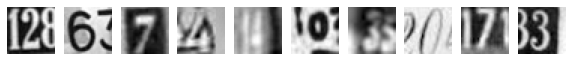

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [7]:
%matplotlib inline
## plotting the first 10 images 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    
plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

We see that the images are shown with their corresponding labels 

In [8]:
X_train[0]# pixel values of the first image

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [9]:
print("Image 1 in the Folder")
print(X_train[0])# pixel values of the first image 
print("Resolution")
print(X_train[0].shape)# resolution of X_train

Image 1 in the Folder
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]
Resolution
(32, 32)


In [10]:
X_train[1]# pixel value of the second image 

array([[86.9591, 87.0685, 88.3735, ..., 91.8014, 89.7477, 92.5302],
       [86.688 , 86.9114, 87.4337, ..., 90.7306, 87.204 , 88.5629],
       [85.9654, 85.8145, 85.9239, ..., 63.8626, 59.8199, 54.8805],
       ...,
       [90.2236, 91.0448, 93.4637, ..., 55.3535, 48.5822, 44.0557],
       [90.6427, 90.4039, 90.937 , ..., 78.2696, 77.4977, 74.27  ],
       [88.0236, 88.1977, 86.6709, ..., 75.2206, 76.6396, 79.2865]],
      dtype=float32)

## Pre-Processing 

In [11]:
#Reshaping according to the problem 
X_train1 = X_train.reshape(X_train.shape[0], 32,32,1)
X_test1 = X_test.reshape(X_test.shape[0], 32,32,1)

In [12]:
# normalize inputs from 0-255 to 0-1
X_train2 = X_train1 / 255.0
X_test2 = X_test1 / 255.0



In [13]:
# one hot encoding 
y_train1= np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test)

In [14]:
print("One value of y_train:", y_train1[0])

One value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
y_train1.shape#checking y_train1 shape 

(42000, 10)

y_train shape is 42000 rows with 10 columns 

In [16]:
X_train2.shape#checking X_train2 shape 


(42000, 32, 32, 1)

X_train2 has been accurately reshaped

In [17]:
X_test2.shape#checking X_test2 shape 

(18000, 32, 32, 1)

X_test2 has been accurately reshaped 

## Building the model 

In [18]:
from tensorflow.keras.layers import Conv2D

model = tf.keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(32, 32, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

2021-12-07 10:57:01.471353: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
history=model.fit( x=X_train2, y=y_train1, batch_size=32, epochs=10, validation_split = 0.3)

2021-12-07 10:57:01.807157: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
919/919 [==============================] - 63s 68ms/step - loss: 0.9831 - accuracy: 0.6910 - val_loss: 0.6129 - val_accuracy: 0.8223
Epoch 2/10
919/919 [==============================] - 74s 81ms/step - loss: 0.4927 - accuracy: 0.8547 - val_loss: 0.5464 - val_accuracy: 0.8397
Epoch 3/10
919/919 [==============================] - 73s 79ms/step - loss: 0.3785 - accuracy: 0.8869 - val_loss: 0.4937 - val_accuracy: 0.8593
Epoch 4/10
919/919 [==============================] - 72s 78ms/step - loss: 0.3022 - accuracy: 0.9085 - val_loss: 0.4781 - val_accuracy: 0.8632
Epoch 5/10
919/919 [==============================] - 66s 71ms/step - loss: 0.2351 - accuracy: 0.9285 - val_loss: 0.5340 - val_accuracy: 0.8599
Epoch 6/10
919/919 [==============================] - 66s 72ms/step - loss: 0.1808 - accuracy: 0.9444 - val_loss: 0.6104 - val_accuracy: 0.8444
Epoch 7/10
919/919 [==============================] - 67s 73ms/step - loss: 0.1360 - accuracy: 0.9583 - val_loss: 0.6203 - val_accuracy:

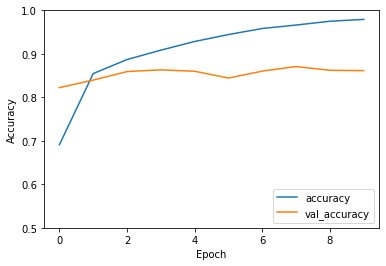

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right');

The validation is not generalising well 

In [21]:
model.evaluate(X_test2, y_test1)

563/563 [==============================] - 8s 13ms/step - loss: 0.7786 - accuracy: 0.8635


[0.7785859107971191, 0.8634999990463257]

* The above model is giving a very good accuracy of 86.34%
* The loss is however a bit high and can be improved

## Hyperparameter tuning 

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(32, 32, 1)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.3))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation="softmax"))

In [25]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
history1=model.fit(x=X_train2, y=y_train1, batch_size=32, epochs=10, validation_data=(X_test2, y_test1), callbacks=[callback])

Epoch 1/10
1313/1313 [==============================] - 86s 65ms/step - loss: 0.9388 - accuracy: 0.7076 - val_loss: 0.5693 - val_accuracy: 0.8385
Epoch 2/10
1313/1313 [==============================] - 94s 72ms/step - loss: 0.5294 - accuracy: 0.8452 - val_loss: 0.4660 - val_accuracy: 0.8673
Epoch 3/10
1313/1313 [==============================] - 93s 71ms/step - loss: 0.4349 - accuracy: 0.8704 - val_loss: 0.4318 - val_accuracy: 0.8767
Epoch 4/10
1313/1313 [==============================] - 84s 64ms/step - loss: 0.3735 - accuracy: 0.8884 - val_loss: 0.4185 - val_accuracy: 0.8795
Epoch 5/10
1313/1313 [==============================] - 85s 64ms/step - loss: 0.3282 - accuracy: 0.9000 - val_loss: 0.4037 - val_accuracy: 0.8842
Epoch 6/10
1313/1313 [==============================] - 92s 70ms/step - loss: 0.2932 - accuracy: 0.9122 - val_loss: 0.3745 - val_accuracy: 0.8948
Epoch 7/10
1313/1313 [==============================] - 90s 68ms/step - loss: 0.2606 - accuracy: 0.9189 - val_loss: 0.3818 -

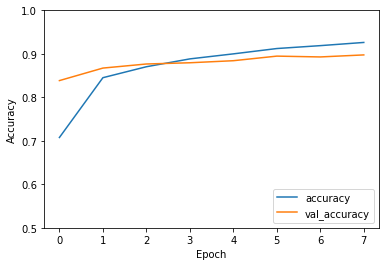

In [27]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right');

The validation is generalising well 

In [26]:
model.evaluate(X_test2, y_test1)

563/563 [==============================] - 5s 9ms/step - loss: 0.3705 - accuracy: 0.8976


[0.370500773191452, 0.8975555300712585]

* We see that the accuracy has improved to 89.75% 
* The loss has also decreased 
* This is the prefered model

## Visualising the outputs

In [28]:
def Prediction(Model):
    print("Test accuracy",model.evaluate(X_test2, y_test1))
    print("Train accuracy",model.evaluate(X_train2, y_train1))
 
    # PREDICTIONS
Y_pred = model.predict(X_test2)
Y_predicted = np.argmax(Y_pred, axis = 1) 
Y_true = np.argmax(y_test1, axis = 1) 

X_test_image = X_test2.reshape(X_test2.shape[0],32,32,1)

def showImage(position):
    print("Predicted",Y_pred[position].argmax(),"Actual ",y_test1[position].argmax())
    plt.imshow((X_test_image[position]*255).astype(np.uint8),cmap='gray')

Predicted 2 Actual  2


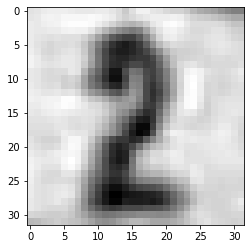

In [29]:
showImage(2)

Predicted 1 Actual  1


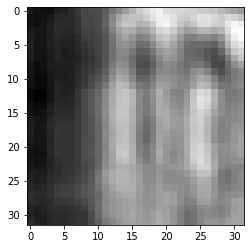

In [30]:
showImage(1000)

Predicted 2 Actual  2


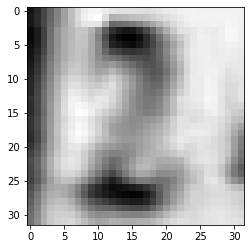

In [31]:
showImage(1500)

## Recommendation 

* The second model is more preffered as it gives a better accuracy on the test set ,has lesser loss and is generalising better with the validation set 
* The model has accurately classified all the images 
* resizing ,normalizing and one hot encoding has enabled to clean and process the data more efficiently 
* hyperparameter tuning has helped to reduce the loss and get a better accuracy 